<a href="https://colab.research.google.com/github/muthonioprah/Financial-Inclusion-across-Kenya-Rwanda-Tanzania-and-Uganda/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_12_Oprah_Muthoni_PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Inclusion in Kenya, Rwanda, Tanzania and Uganda**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services.

Therefore, access to bank accounts is an essential contributor to long-term economic growth



## **Business Understanding**
Understanding the project objectives and requirements from a business perspective, and then convert this knowledge into a data mining problem definition and a preliminary plan designed to achieve the objectives.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [ ]:
#importing the relevant libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the variable definitions from the given link
#
var_def=pd.read_csv('/content/VariableDefinitions.csv')
#
# Lets preview the data
var_def


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Loading the dataset
#
df=pd.read_csv('/content/Financial Dataset - 1.csv')
#View the first five rows
# 
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## **Data Understanding**

In [ ]:
# Let's view the dataframe's statistical details
#
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# Confirm our dataframe's information
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Checking number of rows and columns in our dataframe
#
df.shape

(23524, 13)

In [ ]:
# Confirm the datatypes
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Let's check the column names
#
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Let's check for any missing values
#
df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [ ]:
# Let's check the number of missing values in each column
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Let's confirm the total number of null values
#
df.isnull().sum().sum()

267

In [ ]:
# Let's check for any duplicate values
#
df.duplicated().any()

False

In [ ]:
# Dealing with missing values 
# Since the rows containing missing values are not abundant compared to the total number or rows in our dataframe
# Hence will delete null values
# 
df.dropna(inplace=True)

In [ ]:
# Let's confirm if we still have any null values
#
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#Checking the new shape of our dataframe 
# 
df.shape

(23343, 13)

In [ ]:
#changing the 'year' column data type from integer to datetime
#
# Importing datetime module
#
from datetime import datetime
df['year']=pd.to_datetime(df['year'],format='%Y')
# Confirm the changes made
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.rename(columns={'Has a Bank account':'Bank_account','Type of Location': 'Location','Cell Phone Access': 'Cellphone_access', 
                   'Respondent Age': 'Age','gender_of_respondent': 'Gender','The relathip with head':'Relationship_with_head',
                   'Level of Educuation': 'Education_level','Type of Job': 'Job_type'}, inplace = True)

In [ ]:
# Let's change the cases of the column names
#
df.columns=df.columns.str.capitalize()
# Confirm the changes
df.columns

Index(['Country', 'Year', 'Uniqueid', 'Bank_account', 'Location',
       'Cellphone_access', 'Household_size', 'Age', 'Gender',
       'Relationship_with_head', 'Marital_status', 'Education_level',
       'Job_type'],
      dtype='object')

## Find and deal with outliers, anomalies, and missing data within the dataset.

In [ ]:
# Check for anomalies
# Let's confirm the unique values in each of our columns
#
print(df.Country.unique())
print(df.Year.unique())
print(df.Uniqueid.unique())
print(df.Bank_account.unique())
print(df.Location.unique())
print(df.Cellphone_access.unique())
print(df.Household_size.unique())
print(df.Age.unique())
print(df.Gender.unique())
print(df.Relationship_with_head.unique())
print(df.Marital_status.unique())
print(df.Education_level.unique())
print(df.Job_type.unique())

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
['2018-01-01T00:00:00.000000000' '2029-01-01T00:00:00.000000000'
 '2056-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2039-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000']
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
['Yes' 'No']
['Rural' 'Urban']
['Yes' 'No']
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]
['Female' 'Male']
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
[

In [ ]:
# removing anomalies in 'Years' column
df=df[(df['Year']<= '2018')]
# Confirm changes above
df.Year.unique()

array(['2018-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# We will remove the anomalies in 'Household_size' column
df['Household_size'].replace({0:1}, inplace=True)
# Confirm changes above
print(df.Household_size.unique())

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. 18.
 17. 20.]


In [ ]:
# We will remove the anomalies in 'Education_level' column
df['Education_level'].replace({'6':'Other/Dont know/RTA'}, inplace=True)
# Confirm changes above
print(df.Education_level.unique())

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']


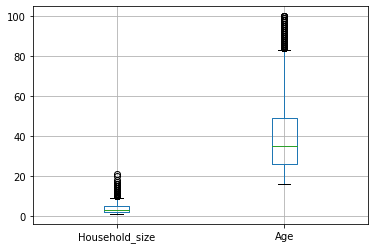

In [ ]:
# Let's check for outliers
#
boxplot=df.boxplot(column=['Household_size','Age'])

# **Univariate Analysis**

In [ ]:
# Frequency Tables
# Let's start with Country 
#
df.Country.value_counts()

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: Country, dtype: int64

In [ ]:
# Gender
df.Gender.value_counts()

Female    13766
Male       9574
Name: Gender, dtype: int64

In [ ]:
# Relationship_with_head 
df.Relationship_with_head.value_counts()

Head of Household      12729
Spouse                  6470
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: Relationship_with_head, dtype: int64

In [ ]:
# Marital_status
df.Marital_status.value_counts()

Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: Marital_status, dtype: int64

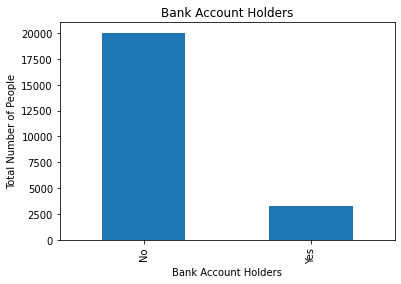

In [ ]:
#plotting bar graphs
df.groupby('Bank_account').size().plot(kind='bar')
plt.title('Bank Account Holders')
plt.ylabel('Total Number of People')
plt.xlabel('Bank Account Holders')
plt.show()

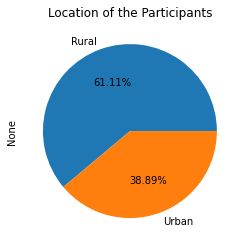

In [ ]:
#pie chart of the participants location
df.groupby('Location').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Location of the Participants')
plt.show()

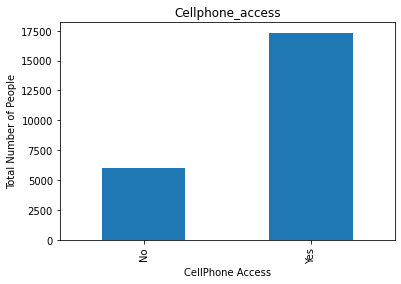

In [ ]:
#df.groupby('Cellphone_access').size().plot(kind='pie', autopct='%.2f%%')
#plt.title('Cellphone Access')
#plt.show()
df.groupby('Cellphone_access').size().plot(kind='bar')
plt.title('Cellphone_access')
plt.ylabel('Total Number of People')
plt.xlabel('CellPhone Access')
plt.show()

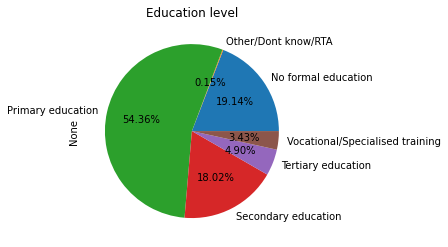

In [ ]:
# Plotting pie charts 
#pie chart of education level
df.groupby('Education_level').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Education level')
plt.show()

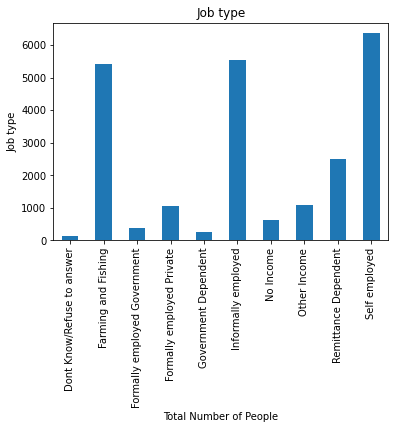

In [ ]:
#People and their jobtype
df.groupby('Job_type').size().plot(kind='bar')
plt.title('Job type')
plt.xlabel('Total Number of People')
plt.ylabel('Job type')
plt.show()

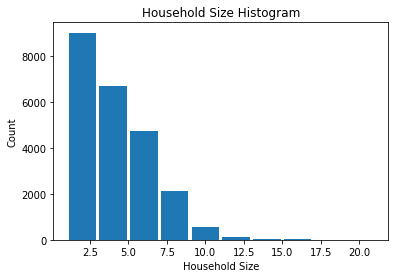

In [ ]:
household_size=df['Household_size']
plt.hist(household_size, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title('Household Size Histogram') 
plt.show()

Household has positive skeweness

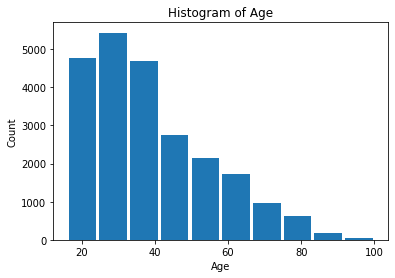

In [ ]:
# Histogram of age
age=df['Age']
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age') 
plt.show()

Age has positive skeweness

#**Measure of Central tendancy**

In [ ]:
# We will calculate the mode, median and mean of our numerical variables i.e Age and Household size
# Mode
#
df[['Age','Household_size']].mean()
df[['Age','Household_size']].mode()
df[['Age','Household_size']].median()

Age               35.0
Household_size     3.0
dtype: float64

# **Measure of Dispersion**

In [ ]:
# Standard deviation
# We will calculate the standard deviation for age and household size
#
df[['Household_size','Age']].std()

Household_size     2.279117
Age               16.519905
dtype: float64

In [ ]:
# Variance
# We will calculate the variance for age and household size
#
df[['Household_size','Age']].var()

Household_size      5.194375
Age               272.907247
dtype: float64

In [ ]:
#Age Quartiles 
#
df['Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Age, dtype: float64

In [ ]:
# Inter-Quartile Range for Age
#
print(49-26)

23


In [ ]:
# Range for Age
#
age_range= df['Age'].max()-df['Age'].min()
age_range

84.0

In [ ]:
#Household size Quartile
#
df['Household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: Household_size, dtype: float64

In [ ]:
# Inter-Quartile Range for Household size
# 
print(5-2)

3


In [ ]:
# Range for Household size
#
household_range= df['Household_size'].max()-df['Household_size'].min()
household_range

20.0

In [ ]:
# Skewness
# Determine the skewness of age and household size
#
df[['Household_size','Age']].skew()

Household_size    0.978928
Age               0.840615
dtype: float64

In [ ]:
# Kurtosis
# Determine the kurtosis of age and household size
#
df[['Household_size','Age']].kurt()

Household_size    1.159338
Age               0.098268
dtype: float64

# **Bivariate Analysis**



Hypothesis Testing
use the Chi-square test to identify relationships between bank account and other categorical variables.
We will use the Chi-squared test of independence to perform hypothesis testing between categorical variables

In [ ]:
bank_acc= df['Bank_account']
country=df['Country']
country_crosstab= pd.crosstab(country,bank_acc)
country_crosstab

Bank_account,No,Yes
Country,,
Kenya,4543,1519
Rwanda,7686,997
Tanzania,5901,599
Uganda,1914,181


Kenya has more account holders compared to the Rwanda, Tanzania and Uganda

In [ ]:
# Null hypothesis:There is no relationship between country and bank account 
# Alternative hypothesis:There is a relationship between country and bank account
#
# Import relevant library
from scipy.stats import chi2_contingency
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(country_crosstab)
chiVal,pVal,d,exp

(828.6311930137034,
 2.6709547856801585e-179,
 3,
 array([[5205.94378749,  856.05621251],
        [7456.81456727, 1226.18543273],
        [5582.09083119,  917.90916881],
        [1799.15081405,  295.84918595]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
ages=df['Age']
age_crosstab= pd.crosstab(ages,bank_acc)
age_crosstab

Bank_account,No,Yes
Age,,
16.0,454,5
17.0,464,10
18.0,562,21
19.0,438,28
20.0,586,36
...,...,...
96.0,3,0
97.0,1,0
98.0,6,0


In [ ]:
# Null hypothesis:There is no relationship between age and bank account 
# Alternative hypothesis:There is a relationship between age and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(age_crosstab)
chiVal,pVal,d,exp

(458.9790653967191,
 4.850568028337298e-53,
 84,
 array([[3.94181491e+02, 6.48185090e+01],
        [4.07063239e+02, 6.69367609e+01],
        [5.00670608e+02, 8.23293916e+01],
        [4.00192973e+02, 6.58070266e+01],
        [5.34163153e+02, 8.78368466e+01],
        [4.02769323e+02, 6.62306769e+01],
        [4.80918595e+02, 7.90814053e+01],
        [4.98094259e+02, 8.19057412e+01],
        [4.79201028e+02, 7.87989717e+01],
        [6.74144816e+02, 1.10855184e+02],
        [5.24716538e+02, 8.62834619e+01],
        [4.86071294e+02, 7.99287061e+01],
        [6.37217138e+02, 1.04782862e+02],
        [4.41414567e+02, 7.25854327e+01],
        [8.95710883e+02, 1.47289117e+02],
        [3.96757841e+02, 6.52421594e+01],
        [6.07159726e+02, 9.98402742e+01],
        [4.51719966e+02, 7.42800343e+01],
        [4.42273350e+02, 7.27266495e+01],
        [7.13648843e+02, 1.17351157e+02],
        [3.91605141e+02, 6.43948586e+01],
        [3.70994344e+02, 6.10056555e+01],
        [4.73189546e+02, 7.

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
hold=df['Household_size']
hold_crosstab= pd.crosstab(hold,bank_acc)
hold_crosstab

Bank_account,No,Yes
Household_size,,
1.0,3292,672
2.0,4445,627
3.0,3010,503
4.0,2728,471
5.0,2304,412
6.0,1760,268
7.0,1201,177
8.0,655,85
9.0,318,36


In [ ]:
# Null hypothesis:There is no relationship between household size and bank account 
# Alternative hypothesis:There is a relationship between household size job type and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(hold_crosstab)
chiVal,pVal,d,exp

(65.55360567396632,
 4.96198562003596e-07,
 19,
 array([[3.40421662e+03, 5.59783376e+02],
        [4.35574841e+03, 7.16251585e+02],
        [3.01690540e+03, 4.96094602e+02],
        [2.74724747e+03, 4.51752528e+02],
        [2.33245518e+03, 3.83544816e+02],
        [1.74161234e+03, 2.86387661e+02],
        [1.18340326e+03, 1.94596744e+02],
        [6.35499572e+02, 1.04500428e+02],
        [3.04009254e+02, 4.99907455e+01],
        [1.64027592e+02, 2.69724079e+01],
        [5.66796915e+01, 9.32030848e+00],
        [5.66796915e+01, 9.32030848e+00],
        [2.14695801e+01, 3.53041988e+00],
        [7.72904884e+00, 1.27095116e+00],
        [9.44661525e+00, 1.55338475e+00],
        [3.43513282e+00, 5.64867181e-01],
        [8.58783205e-01, 1.41216795e-01],
        [8.58783205e-01, 1.41216795e-01],
        [8.58783205e-01, 1.41216795e-01],
        [8.58783205e-01, 1.41216795e-01]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
job= df['Job_type']
job_crosstab= pd.crosstab(job,bank_acc)
job_crosstab

Bank_account,No,Yes
Job_type,,
Dont Know/Refuse to answer,111,14
Farming and Fishing,4788,634
Formally employed Government,87,299
Formally employed Private,481,566
Government Dependent,197,50
Informally employed,5109,440
No Income,605,13
Other Income,881,196
Remittance Dependent,2268,240


The self employed demographic has the most account holders

In [ ]:
# Null hypothesis:There is no relationship between relationship job type and bank account 
# Alternative hypothesis:There is a relationship between relationship job type and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(job_crosstab)
chiVal,pVal,d,exp

(2999.314013639475, 0.0, 9, array([[ 107.3479006 ,   17.6520994 ],
        [4656.32253642,  765.67746358],
        [ 331.49031705,   54.50968295],
        [ 899.14601542,  147.85398458],
        [ 212.11945159,   34.88054841],
        [4765.38800343,  783.61199657],
        [ 530.72802057,   87.27197943],
        [ 924.90951157,  152.09048843],
        [2153.82827763,  354.17172237],
        [5462.71996572,  898.28003428]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
rel=df['Relationship_with_head']
rel_crosstab= pd.crosstab(rel,bank_acc)
rel_crosstab

Bank_account,No,Yes
Relationship_with_head,,
Child,2028,193
Head of Household,10471,2258
Other non-relatives,169,20
Other relative,597,65
Parent,1004,65
Spouse,5775,695


Most account holdersare heads of the households

In [ ]:
# Null hypothesis:There is no relationship between relationship with the head of household and bank account 
# Alternative hypothesis:There is a relationship between relationship with the head of household and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(rel_crosstab)
chiVal,pVal,d,exp

(321.37632166913426,
 2.5316623970983745e-67,
 5,
 array([[ 1907.35749786,   313.64250214],
        [10931.45141388,  1797.54858612],
        [  162.31002571,    26.68997429],
        [  568.51448158,    93.48551842],
        [  918.03924593,   150.96075407],
        [ 5556.32733505,   913.67266495]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
status= df['Marital_status']
status_crosstab=pd.crosstab(status,bank_acc)
status_crosstab

Bank_account,No,Yes
Marital_status,,
Divorced/Seperated,1817,232
Dont know,6,2
Married/Living together,8838,1860
Single/Never Married,6943,959
Widowed,2440,243


Most account holders are Married/Living together

In [ ]:
# Null hypothesis:There is no relationship between relationship marital status and bank account 
# Alternative hypothesis:There is a relationship between relationship marital status and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(status_crosstab)
chiVal,pVal,d,exp

(190.47547971070537,
 4.189098063009839e-40,
 4,
 array([[1.75964679e+03, 2.89353213e+02],
        [6.87026564e+00, 1.12973436e+00],
        [9.18726272e+03, 1.51073728e+03],
        [6.78610488e+03, 1.11589512e+03],
        [2.30411534e+03, 3.78884662e+02]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
gen=df['Gender']
gender_crosstab= pd.crosstab(gen,bank_acc)
gender_crosstab

Bank_account,No,Yes
Gender,,
Female,12286,1480
Male,7758,1816


Most account holders are Female

In [ ]:
# Null hypothesis:There is no relationship between Gender and bank account 
# Alternative hypothesis:There is a relationship between Gender and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(gender_crosstab)
chiVal,pVal,d,exp

(313.6976471873478,
 3.417686933735945e-70,
 1,
 array([[11822.00959726,  1943.99040274],
        [ 8221.99040274,  1352.00959726]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
cell= df['Cellphone_access']
cell_crosstab= pd.crosstab(cell,bank_acc)
cell_crosstab

Bank_account,No,Yes
Cellphone_access,,
No,5905,104
Yes,14139,3192


People with bankaccounts also have cell phone access

In [ ]:
# Null hypothesis:There is no relationship between Cellphone access and bank account 
# Alternative hypothesis:There is a relationship between Cellphone access and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(cell_crosstab)
chiVal,pVal,d,exp

(1023.1392173763973,
 1.6776103338033457e-224,
 1,
 array([[ 5160.42827763,   848.57172237],
        [14883.57172237,  2447.42827763]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
level= df['Education_level']
level_crosstab= pd.crosstab(level,bank_acc)
level_crosstab

Bank_account,No,Yes
Education_level,,
No formal education,4291,176
Other/Dont know/RTA,24,11
Primary education,11605,1083
Secondary education,3225,981
Tertiary education,554,589
Vocational/Specialised training,345,456


Most account holders have an education up to primary school

In [ ]:
# Null hypothesis:There is no relationship between relationship education level and bank account 
# Alternative hypothesis:There is a relationship between relationship education level and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(level_crosstab)
chiVal,pVal,d,exp

(3539.91608493269, 0.0, 5, array([[3.83618458e+03, 6.30815424e+02],
        [3.00574122e+01, 4.94258783e+00],
        [1.08962413e+04, 1.79175870e+03],
        [3.61204216e+03, 5.93957841e+02],
        [9.81589203e+02, 1.61410797e+02],
        [6.87885347e+02, 1.13114653e+02]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

In [ ]:
loc=df['Location']
location_crosstab= pd.crosstab(loc,bank_acc)
location_crosstab

Bank_account,No,Yes
Location,,
Rural,12600,1663
Urban,7444,1633


Rural areas have more people who aren't bank account holders

In [ ]:
# Null hypothesis:There is no relationship between location and bank account 
# Alternative hypothesis:There is a relationship between location and bank account
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(location_crosstab)
chiVal,pVal,d,exp

(182.8048539167342,
 1.1831299759708535e-41,
 1,
 array([[12248.82485004,  2014.17514996],
        [ 7795.17514996,  1281.82485004]]))

The p-value is less than 0.05, the null hypothesis is rejected. Meaning that there is an association between location and bank account holders.

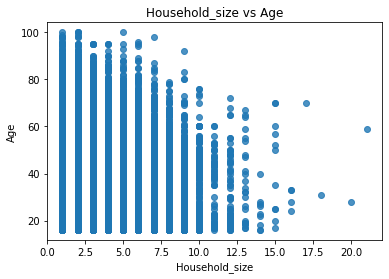

In [ ]:
# Scatter Plots
# Identify correlation between Cellphone access and Age
sns.regplot(x = df['Household_size'], y = df['Age'], fit_reg=False)
plt.title('Household_size vs Age')
plt.show()

In [ ]:
#Calculate the pearson correlation coefficient
#
df['Age'].corr(df['Household_size'])

-0.11908235076249986

The variables have a weak negative correlation

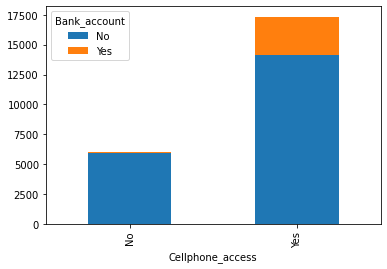

In [ ]:
# Stacked column charts
df.groupby(['Cellphone_access','Bank_account']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Most people with cellphone access are also bank account holders

In [ ]:
# Null hypothesis: Mean of age is equal to mean of bank account
# Alternative: Mean of age is not equal to mean of bank account
#
# Age Z score 
age_z=(38.675763-39.605583)/np.sqrt(np.square(283.828059)/20044 + np.square(205.817681)/3296)
print(age_z)
#
# Find p-value
import scipy.stats
scipy.stats.norm.sf(abs(-0.22637301401701918))*2

-0.22637301401701918


0.8209113148795967

pvalue is greater that 0.05, therefore the null hypothesis isaccepted. Meaning there is a relationship between age and bank account

In [ ]:
# Null hypothesis: Mean of household size is equal to mean of bank account
# Alternative: Mean of household size is not equal to mean of bank account
#
# Household size Z score 
house_z=age_z=(3.711634-3.559163)/np.sqrt(np.square(5.238500)/20044 + np.square(4.907576)/3296)
print(house_z)
#
# Find p-value
import scipy.stats
scipy.stats.norm.sf(abs(1.636900022638321))*2

1.636900022638321


0.10165136122059407

pvalue is greater that 0.05, therefore the null hypothesis isaccepted. Meaning there is a relationship between age and bank account

# **Multivariate Analysis**

In [ ]:
# PCA to perform dimension reduction
#
# Import the label encoder
from sklearn.preprocessing import LabelEncoder
#
# Encode labels of multiple columns at once
cols = ['Country', 'Bank_account', 'Location', 'Cellphone_access', 'Gender', 'Relationship_with_head','Marital_status', 'Education_level', 'Job_type']
#
# covert our categorical into dummy variables through encoding
df_1= df[cols].apply(LabelEncoder().fit_transform)
#
# Preview
df_1.head()

,Country,Bank_account,Location,Cellphone_access,Gender,Relationship_with_head,Marital_status,Education_level,Job_type
0,0,1,0,1,0,5,2,3,9
1,0,0,0,0,0,1,4,0,4
2,0,1,1,1,1,3,3,5,9
3,0,0,0,1,0,1,2,2,3
4,0,0,1,0,1,0,3,2,5


In [ ]:
# 1 Feature Set
#
# Splitting the dataset into the Training set and Test set
m = df_1.drop(['Bank_account'], 1)
n = df_1['Bank_account']
#
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=0)
#
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
m_train = sc.fit_transform(m_train)
m_test = sc.transform(m_test)
#
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
m_train = pca.fit_transform(m_train)
m_test = pca.transform(m_test)
#
# finding explained variance ratio
variance_explained = pca.explained_variance_ratio_
variance_explained
#
# Using 1 Principal Component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
m_train = pca.fit_transform(m_train)
m_test = pca.transform(m_test)
#
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(m_train, n_train)
# Predicting the Test set results
n_pred = classifier.predict(m_test)
# 
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(n_test, n_pred)
print(cm)
print('Accuracy' , accuracy_score(n_test, n_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [ ]:
# 2 Feature Set
#
# Splitting the dataset into the Training set and Test set
m = df_1.drop(['Bank_account'], 1)
n = df_1['Bank_account']
#
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=0)
#
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
m_train = sc.fit_transform(m_train)
m_test = sc.transform(m_test)
#
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
m_train = pca.fit_transform(m_train)
m_test = pca.transform(m_test)
#
# Explained variance ratio
variance_explained1 = pca.explained_variance_ratio_
variance_explained1
#
# Using 2 Principal Component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
m_train = pca.fit_transform(m_train)
m_test = pca.transform(m_test)
#
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(m_train, n_train)
# Predicting the Test set results
# Predicting the Test set results
#n_pred = classifier.predict(m_test)
# 
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(n_test, n_pred)
print(cm)
print('Accuracy' , accuracy_score(n_test, n_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [ ]:
#All Feature Sets
#
# Splitting the dataset into the Training set and Test set
m = df_1.drop(['Bank_account'], 1)
n = df_1['Bank_account']
#
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=0)
#
# Normalization
from sklearn.preprocessing import StandardScaler
sc3 = StandardScaler()
m_train = sc.fit_transform(m_train)
m_test = sc.transform(m_test)
#
# Applying PCA
from sklearn.decomposition import PCA
pca1 = PCA()
m_train = pca.fit_transform(m_train)
m_test = pca.transform(m_test)
#
# Explained variance ratio
explained_variance3 = pca.explained_variance_ratio_
explained_variance3
#
# Using all Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
m_train = pca.fit_transform(m_train)
m_test = pca.transform(m_test)
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(m_train, n_train)
# Predicting the Test set results
n_pred = classifier.predict(m_test)
# 
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm3 = confusion_matrix(n_test, n_pred)
print(cm3)
print('Accuracy' , accuracy_score(n_test, n_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


# **Conclusion and Findings**

From the above analysis, We have found that:

 **1. All the number of principal components met an accuracy of 86.46%** 

**2. There is a relationship between the categorical data and bank account holders. That is;**

*   Cellphone access and bank account holders.
*   Relationship with the head of household and bank account holders.
*   Marital  and bank account holders.
*   Education level and bank account holders.
*   Type of job and bank account holders.
*   Gender and bank account holders
*   Age and household size 
*   Age and bank account holders.


##**Challenging the solution**

1. From the data analysis, most account holders are in rural areas whereas Most banking institutions are in urban areas
2. The Head of Households had both the highst number of account holders and the largest number on non-account holders 




